In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, PatchTST

from neuralforecast.losses.pytorch import MAE
from neuralforecast.losses.numpy import mae, mse

In [82]:
### Load Dataset
df = pd.read_csv(r"E:\PROFESSION\NG\Research\PN_Raja\Muenster_hai.csv")
df.head()

,AGG_DAY_PERIOD,GEOGRAPHY,ACTIVITY_INDEX_TOTAL,XLON,XLAT
0,2020-12-31,120203021133103213,0.081590,7.003098,51.442453
1,2020-12-31,120203021130221130,0.016807,6.875381,51.465558
2,2020-12-31,120203021130303123,0.127186,6.917953,51.471547
3,2020-12-31,120203012210111031,0.024016,7.288742,51.833656
4,2020-12-31,120203012112121023,0.033855,7.615585,51.981920


In [83]:
# Convert 'date' column to datetime
df['ds'] = pd.to_datetime(df['AGG_DAY_PERIOD'])
df['y'] = df['ACTIVITY_INDEX_TOTAL']

# Group by date and compute centroid of latitude and longitude
result = df.groupby('ds').agg(
    Lat=('XLAT', 'mean'),
    Lon=('XLON', 'mean'),
    y=('y', 'sum')
).reset_index()

result['unique_id'] = 1
result['ds'] = pd.to_datetime(result.ds)
# Save the result to a new CSV file
result.to_csv('Daily_HAI.csv', index=False)

print("Grouping completed and saved to grouped_data.csv")

Grouping completed and saved to grouped_data.csv


In [2]:
### Load Daily_HAI Dataset
df = pd.read_csv(r"C:\Users\janak\Muenster_HAI_PatchTST\Daily_HAI.csv")


In [3]:
df['ds'] = pd.to_datetime(df.ds, format='%Y-%m-%d')

In [50]:
### Define Validation and Test Size
n_time = 366
val_size = 48
test_size = 48

print(n_time, val_size, test_size)

366 48 48


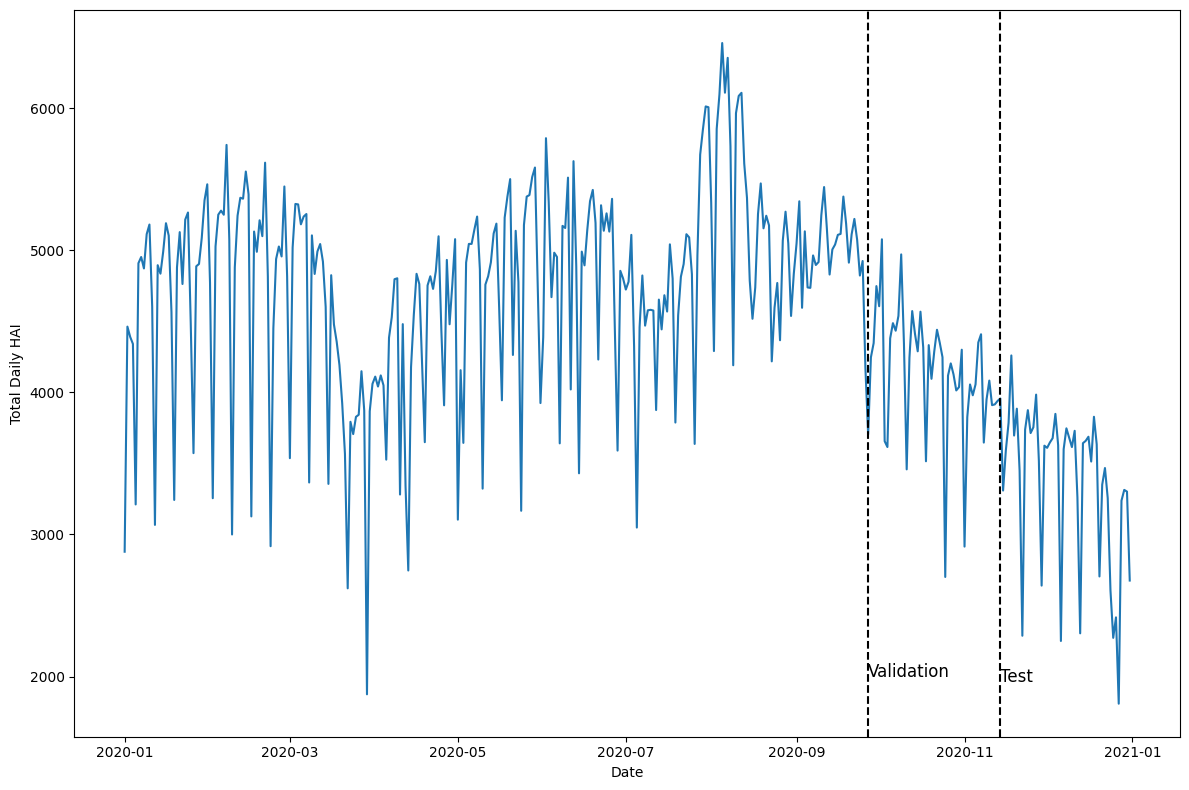

In [51]:
x_plot = df.ds
y_plot = df.y.values

x_plot

x_val = x_plot[n_time - val_size - test_size]
x_test = x_plot[n_time - test_size]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_plot, y_plot)
ax.set_xlabel('Date')
ax.set_ylabel('Total Daily HAI')
ax.axvline(x_val, color='black', linestyle='--')
ax.axvline(x_test, color='black', linestyle='--')

plt.text(x_val, 2000, 'Validation', fontsize=12)
plt.text(x_test,2000, 'Test', verticalalignment='center', fontsize=12)

plt.tight_layout()

In [52]:
### Define Models
horizon = 48

models = [NHITS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         NBEATS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         PatchTST(h=horizon,
                 input_size=2*horizon,
                 max_steps=50)]

C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\utilities\parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1
Seed set to 1
Seed set to 1


In [53]:
### Model Initiation
nf = NeuralForecast(models=models, freq='D')


In [54]:
test_size

48

In [55]:
### Model Running
preds_df = nf.cross_validation(df=df, val_size=val_size, test_size=test_size, n_windows=None)


C:\Users\janak\anaconda3\envs\python38\lib\site-packages\neuralforecast\common\_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.7 M 
-----------------------------------------------
2.7 M     Trainable params
0         Non-trainable params
2.7 M     Total params
10.618    Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\utilities\data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\loops\fit_loop.py:298: Th

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.7 M 
-----------------------------------------------
2.7 M     Trainable params
14.0 K    Non-trainable params
2.7 M     Total params
10.801    Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type              | Params
---------------------------------------------------
0 | loss         | MAE               | 0     
1 | padder_train | ConstantPad1d     | 0     
2 | scaler       | TemporalNorm      | 0     
3 | model        | PatchTST_backbone | 474 K 
---------------------------------------------------
474 K     Trainable params
3         Non-trainable params
474 K     Total params
1.900     Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

C:\Users\janak\anaconda3\envs\python38\lib\site-packages\neuralforecast\core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [57]:
preds_df.head()

,ds,cutoff,NHITS,NBEATS,PatchTST,y
unique_id,,,,,,
1,2020-11-14,2020-11-13,3861.626953,3789.714844,4480.631836,3956.577539
1,2020-11-15,2020-11-13,3900.638916,3876.225830,3866.958008,3308.605444
1,2020-11-16,2020-11-13,3936.125732,4014.054932,4352.959473,3589.774367
1,2020-11-17,2020-11-13,4174.599609,4211.007812,4637.656738,3785.666727
1,2020-11-18,2020-11-13,4262.630371,4052.979492,4653.612793,4259.199337


In [64]:
y_true = preds_df['y'].values
y_pred_nhits = preds_df['NHITS'].values
y_pred_nbeats = preds_df['NBEATS'].values
y_pred_patchtst = preds_df['PatchTST'].values

n_series = len(df['unique_id'].unique())

y_true = y_true.reshape(n_series, -1, horizon)
y_pred_nhits = y_pred_nhits.reshape(n_series, -1, horizon)
y_pred_nbeats = y_pred_nbeats.reshape(n_series, -1, horizon)
y_pred_patchtst = y_pred_patchtst.reshape(n_series, -1, horizon)

print(y_true.shape)
print(y_pred_nhits.shape)
print(y_pred_nbeats.shape)
print(y_pred_patchtst.shape)
print(n_series)

(1, 1, 48)
(1, 1, 48)
(1, 1, 48)
(1, 1, 48)
1


In [16]:
import pdb

In [17]:
### Load Daily_HAI Dataset
df = pd.read_csv(r"C:\Users\janak\Muenster_HAI_PatchTST\Daily_HAI.csv")
df['ds'] = pd.to_datetime(df.ds, format='%Y-%m-%d')
### Define Validation and Test Size
n_time = 366
val_size = 24
test_size = 48

print(n_time, val_size, test_size)


### Define Models
horizon = 48

models = [NHITS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         NBEATS(h=horizon,
               input_size=2*horizon,
               max_steps=50),
         PatchTST(h=horizon,
                 input_size=2*horizon,
                 max_steps=50)]

### Model Initiation
nf = NeuralForecast(models=models, freq='D')
pdb.set_trace()

### Model Running
preds_df = nf.cross_validation(df=df, val_size=val_size, test_size=test_size, n_windows=None)


366 24 48


C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\utilities\parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1
Seed set to 1
Seed set to 1


--Return--
None
> c:\users\janak\appdata\local\temp\ipykernel_26232\2062048278.py(27)<module>()



ipdb>  
ipdb>  
ipdb>  
ipdb>  c


C:\Users\janak\anaconda3\envs\python38\lib\site-packages\neuralforecast\common\_base_model.py:204: UserWarning: val_check_steps is greater than max_steps,                     setting val_check_steps to max_steps
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.7 M 
-----------------------------------------------
2.7 M     Trainable params
0         Non-trainable params
2.7 M     Total params
10.618    Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

C:\Users\janak\anaconda3\envs\python38\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


RuntimeError: maximum size for tensor at dimension 2 is 120 but size is 144